1. Suppose a director of marketing with many years of experience tells you he believes very strongly that the variant without images (B) won’t perform any differently than the original variant. How could you account for this in our model? Implement this change and see how your final conclusions change as well.

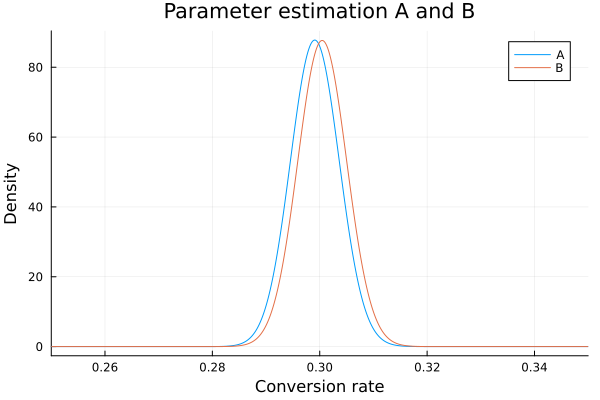

In [2]:
using Distributions, Plots
li = Beta(3000, 7000) # The new likelihood
a = Beta(36 + 3000, 114 + 7000)
b = Beta(50 + 3000, 100 + 7000)
x = 0:0.0001:1
y1 = pdf.(a,x)
y2 = pdf.(b,x)
f = plot(title = "Parameter estimation A and B", xlabel = "Conversion rate", ylabel = "Density", xlim = (0.25, 0.35))
plot!(f, x, y1, label = "A")
plot!(f, x, y2, label = "B")

In [3]:
t = 100000
mca = rand(a, t)
mcb = rand(b, t)
p_b_better = sum(mcb .> mca) /  t

0.58677

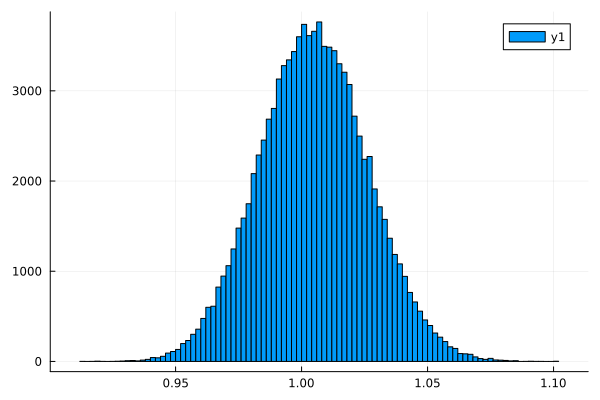

In [4]:
rab = mcb ./ mca
histogram(rab)

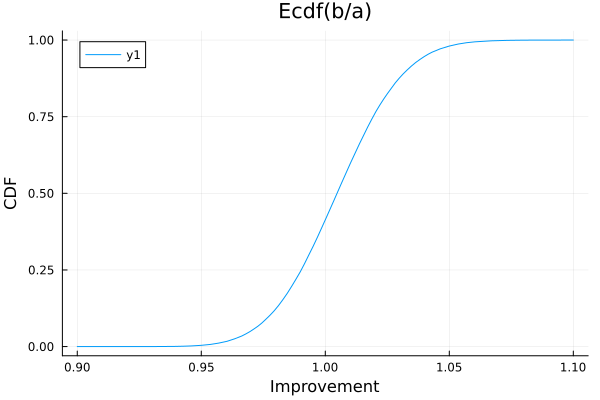

In [5]:
using StatsBase
recdf  = ecdf(rab)
plot(x -> recdf(x), 0.9,1.1, xlabel = "Improvement", ylabel = "CDF", title = "Ecdf(b/a)")

2. The lead designer sees your results and insists that there’s no way that variant B should perform better with no images. She feels that you should assume the conversion rate for variant B is closer to 20 percent than 30 percent. Implement a solution for this and again review the results of our analysis.

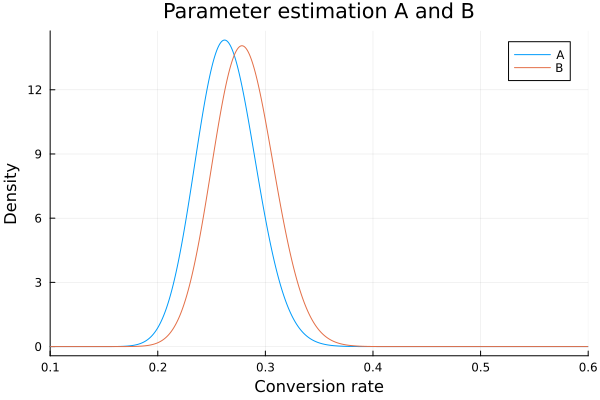

In [6]:
a = Beta(36 + 30, 114 + 70)
b = Beta(50 + 20, 100 + 80)
x = 0:0.0001:1
y1 = pdf.(a,x)
y2 = pdf.(b,x)
f = plot(title = "Parameter estimation A and B", xlabel = "Conversion rate", ylabel = "Density", xlim = (0.1, 0.6))
plot!(f, x, y1, label = "A")
plot!(f, x, y2, label = "B")

In [7]:
t = 100000
mca = rand(a, t)
mcb = rand(b, t)
p_b_better = sum(mcb .> mca) /  t

0.65482

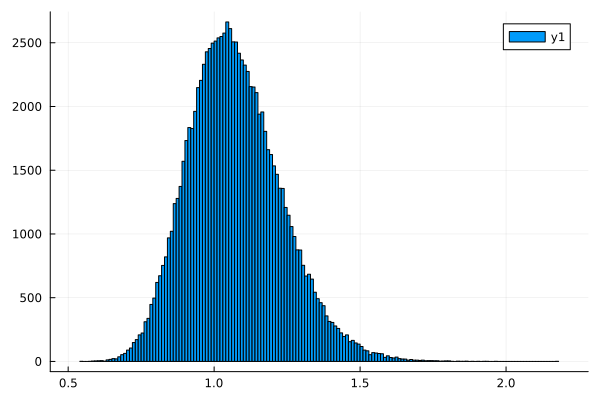

In [8]:
rab = mcb ./ mca
histogram(rab)

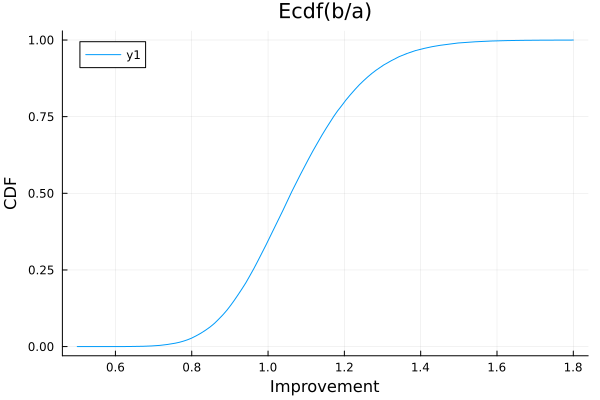

In [9]:
using StatsBase
recdf  = ecdf(rab)
plot(x -> recdf(x), 0.5,1.8, xlabel = "Improvement", ylabel = "CDF", title = "Ecdf(b/a)")

3. Assume that being 95 percent certain means that you’re more or less “convinced” of a hypothesis. Also assume that there’s no longer any limit to the number of emails you can send in your test. If the true conversion for A is 0.25 and for B is 0.3, explore how many samples it would take to convince the director of marketing that B was in fact superior. Explore the same for the lead designer.

In [24]:
# convince the director of marketing
numbers = 0
t = 100000
bbetter = 0
atrue = 0.25
btrue = 0.3
α = 300
β = 700
while bbetter < 0.95
    numbers += 100
    agroup = numbers / 2
    bgroup = numbers / 2
    aclick = agroup * atrue
    bclick = bgroup * btrue
    aresult = Beta(α + aclick, β + agroup - aclick)
    bresult = Beta(α + bclick, β + bgroup - bclick)
    ma = rand(aresult, t)
    mb = rand(bresult, t)
    bbetter = sum(mb .> ma) / t
end

numbers

1900

In [23]:
# lead designer
numbers = 0
t = 100000
bbetter = 0
atrue = 0.25
btrue = 0.3
α_a = 30
β_a = 70
α_b = 20
β_b = 80
while bbetter < 0.95
    numbers += 100
    agroup = numbers / 2
    bgroup = numbers / 2
    aclick = agroup * atrue
    bclick = bgroup * btrue
    aresult = Beta(α_a + aclick, β_a + agroup - aclick)
    bresult = Beta(α_b + bclick, β_b + bgroup - bclick)
    ma = rand(aresult, t)
    mb = rand(bresult, t)
    bbetter = sum(mb .> ma) / t
end

numbers

1700